# Mount errors

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [4]:
pandasFilename = "mountErrors.csv"

In [5]:

pickleFilename = "mountErrors.pickle"
with open(pickleFilename, "rb") as f:
    mountErrors = pickle.load(f)

In [6]:
type(mountErrors)

dict

In [7]:
list_of_keys = list(mountErrors.keys())

    (20220912, 72): {'az_rms': 0.004986849940960544,
    'el_rms': 0.004895265935733304,
    'rot_rms': 0.15965472742011194,
    'image_az_rms': 0.0038756729812899683,
    'image_el_rms': 0.004895265935733304,
    'image_rot_rms': 0.00021672782909983534},

In [8]:
df_infos=pd.DataFrame(columns=['idx','date_obs','seq','exposure','status','az_rms','el_rms','rot_rms','image_az_rms','image_el_rms','image_rot_rms'])

In [9]:
idx=0
for key in list_of_keys:
    value = mountErrors[key]
    
    if value!= False and value != 'failed':
        dateobs=key[0]
        seq=key[1]
        exposure = dateobs*100000 + seq
        
        az_rms = value['az_rms']
        el_rms = value['el_rms']
        rot_rms = value['rot_rms']
        image_az_rms = value['image_az_rms']
        image_el_rms = value['image_el_rms']
        image_rot_rms = value['image_rot_rms'] 
        
        arr = [idx,dateobs,seq,exposure,True,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms]

        df_infos.loc[idx] = arr
    idx+=1
    

In [10]:
mountErrors[(20220912, 72)]['az_rms']

0.004986849940960544

In [11]:
value

False

In [12]:
df_infos

,idx,date_obs,seq,exposure,status,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms
437,437,20220908,66,2022090800066,True,0.040777,0.026023,0.291703,0.020020,0.026023,0.000396
444,444,20220908,73,2022090800073,True,0.011192,0.007489,0.614963,0.005322,0.007489,0.000835
447,447,20220912,3,2022091200003,True,0.006601,0.005453,0.706174,0.005130,0.005453,0.000959
516,516,20220912,72,2022091200072,True,0.004987,0.004895,0.159655,0.003876,0.004895,0.000217
522,522,20220912,78,2022091200078,True,0.098272,0.052172,0.148901,0.048586,0.052172,0.000202
...,...,...,...,...,...,...,...,...,...,...,...
43253,43253,20230321,43,2023032100043,True,0.010867,0.011750,0.004012,0.009384,0.011750,0.000005
43254,43254,20230321,44,2023032100044,True,0.010794,0.007538,0.007706,0.009318,0.007538,0.000010
43255,43255,20230321,45,2023032100045,True,0.023044,0.014788,0.300176,0.019884,0.014788,0.000407
43256,43256,20230321,46,2023032100046,True,0.265174,0.060447,0.004043,0.246965,0.060447,0.000005


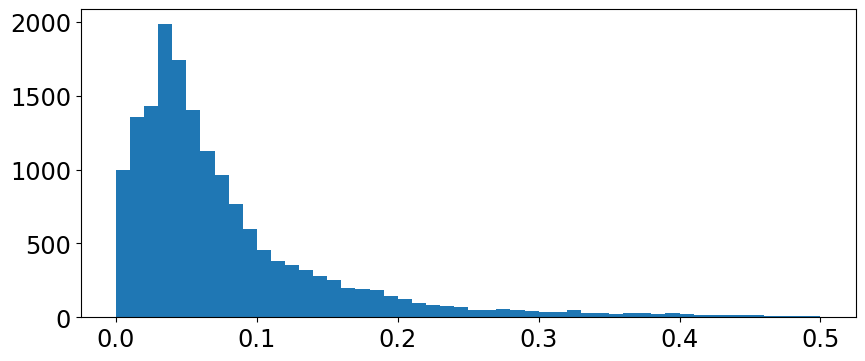

In [21]:
plt.hist(df_infos["az_rms"].values,bins=50, range=(0,0.5));

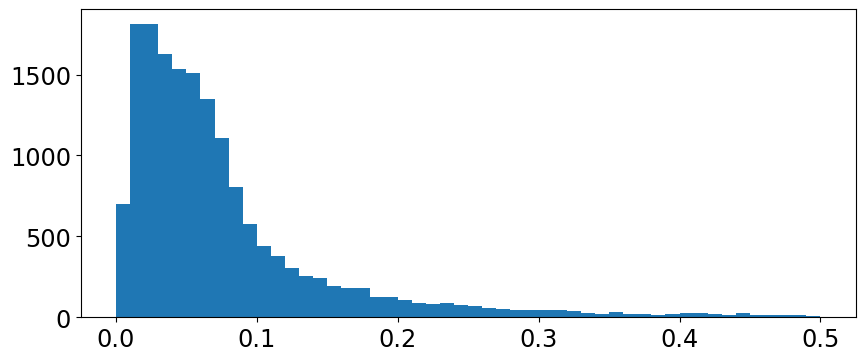

In [13]:
plt.hist(df_infos["el_rms"].values,bins=50, range=(0,0.5));

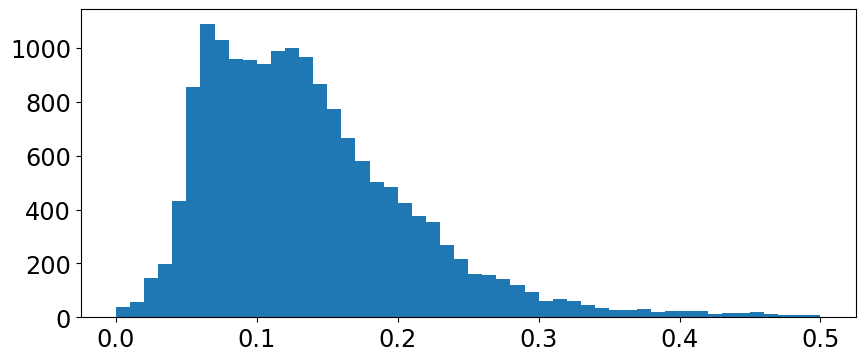

In [14]:
plt.hist(df_infos["rot_rms"].values,bins=50, range=(0,0.5));

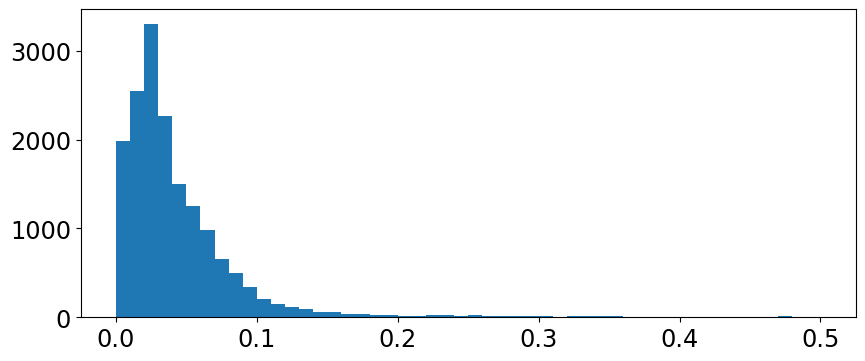

In [15]:
plt.hist(df_infos["image_az_rms"].values,bins=50, range=(0,0.5));

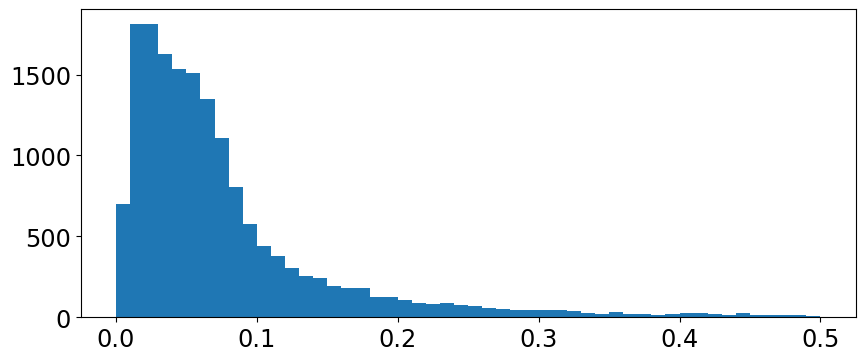

In [16]:
plt.hist(df_infos["image_el_rms"].values,bins=50, range=(0,0.5));

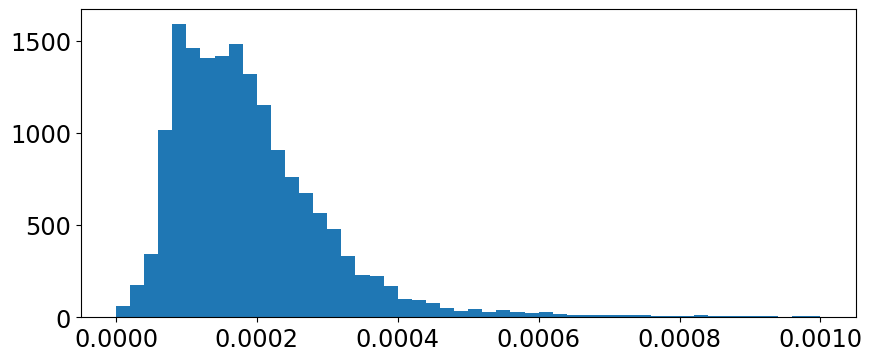

In [17]:
plt.hist(df_infos['image_rot_rms'].values,bins=50, range=(0,1e-3));

(array([2.0220e+12, 2.0222e+12, 2.0224e+12, 2.0226e+12, 2.0228e+12,
        2.0230e+12, 2.0232e+12]),
 [Text(2022000000000.0, 0, '2.0220'),
  Text(2022200000000.0, 0, '2.0222'),
  Text(2022400000000.0, 0, '2.0224'),
  Text(2022600000000.0, 0, '2.0226'),
  Text(2022800000000.0, 0, '2.0228'),
  Text(2023000000000.0, 0, '2.0230'),
  Text(2023200000000.0, 0, '2.0232')])

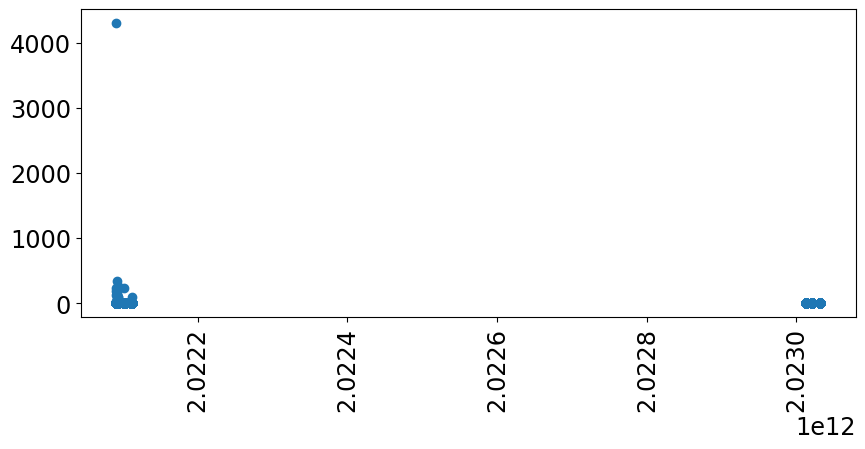

In [18]:
plt.scatter(df_infos['exposure'].values,df_infos["el_rms"].values);
plt.xticks(rotation=90)

(array([2.0220e+12, 2.0222e+12, 2.0224e+12, 2.0226e+12, 2.0228e+12,
        2.0230e+12, 2.0232e+12]),
 [Text(2022000000000.0, 0, '2.0220'),
  Text(2022200000000.0, 0, '2.0222'),
  Text(2022400000000.0, 0, '2.0224'),
  Text(2022600000000.0, 0, '2.0226'),
  Text(2022800000000.0, 0, '2.0228'),
  Text(2023000000000.0, 0, '2.0230'),
  Text(2023200000000.0, 0, '2.0232')])

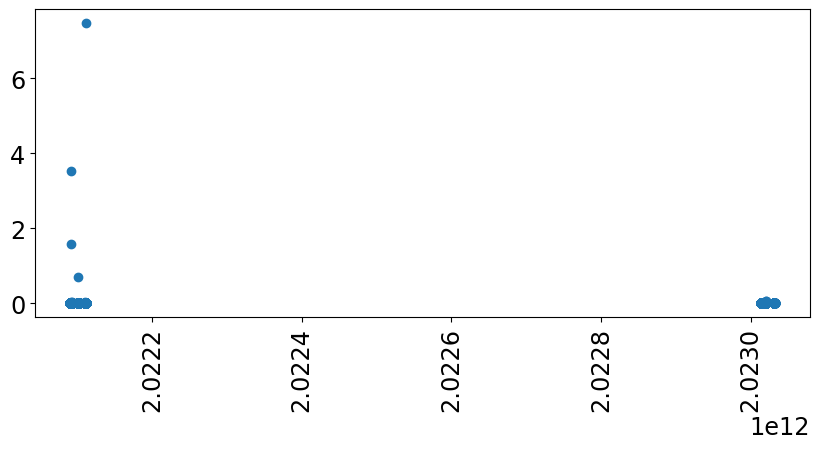

In [19]:
plt.scatter(df_infos['exposure'].values,df_infos['image_rot_rms'].values);
plt.xticks(rotation=90)

In [20]:
df_infos.to_csv(pandasFilename)